# **Introduction to Computer Vision. Lab 12. Single Object Detection and Localization**


## **Theory:**

**Single Object Detection and Localization:**
- Single object detection involves identifying the presence of an object in an image and its category (class). Localization involves determining the precise location of the object within the image using bounding boxes.
- This task is crucial in various applications, including autonomous driving, robotics, and surveillance systems.

**Convolutional Neural Networks (CNNs):**
- CNNs are effective for image-related tasks due to their ability to capture spatial hierarchies in data through convolutional layers.
- For object detection and localization, the CNN architecture is typically modified to include additional outputs for predicting bounding box coordinates along with the class probabilities.

**Architecture Modifications:**
1. **Output Layer Adjustments:**
   - The output layer is designed to predict class probabilities (including the 'no-object' class) and the bounding box coordinates \((x, y, w, h)\).
   - A common approach is to have separate outputs for classification and bounding box regression.

2. **Loss Function:**
   - A custom loss function that combines classification loss (categorical cross-entropy) and localization loss (mean squared error) is used to train the model.
   - The classification loss ensures accurate class predictions, while the localization loss ensures accurate bounding box predictions.

**Training and Evaluation:**
- The model is trained on a dataset with annotated bounding boxes and class labels.
- Evaluation metrics include the accuracy of object classification and the precision of bounding box predictions, often measured using metrics like Intersection over Union (IoU).



## **Excercise 1: Use your already built convolutional neural network to perform single object detection and localization of C classes plus the 'no-object' class, with one of the schemes described belowyouc can check [this video](https://www.youtube.com/watch?v=kfNJPQyyODI&feature=youtu.be)**

**Scheme 1:**

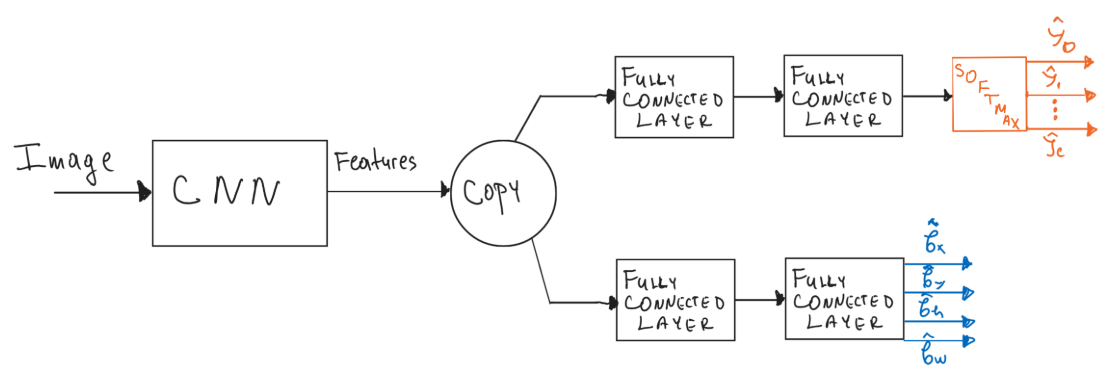

**Scheme 2:**

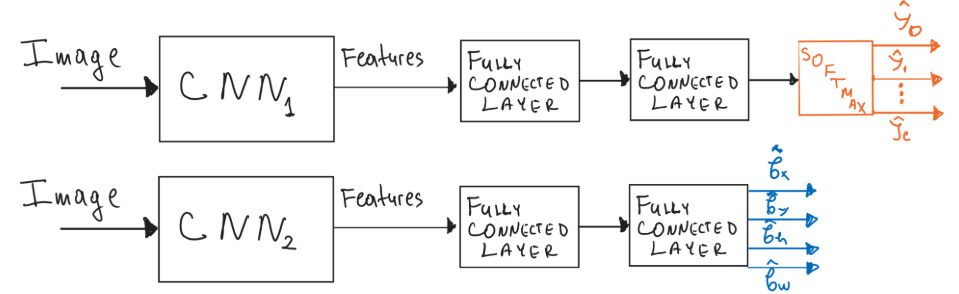

### Single Object Detection and Localization using Convolutional Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import json
import os
import cv2
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
def load_dataset(data_dir):
    images = []
    labels = []
    bboxes = []
    annotations_path = os.path.join(data_dir, 'annotations.json')
    with open(annotations_path, 'r') as f:
        annotations = json.load(f)
    for ann in annotations['annotations']:
        img_path = os.path.join(data_dir, 'images', ann['file_name'])
        image = ''' TO DO '''
        image = ''' TO DO '''
        label = ''' TO DO '''
        bbox = ''' TO DO '''
        images.append(image)
        labels.append(label)
        bboxes.append(bbox)
    images = np.array(images)
    labels = np.array(labels)
    bboxes = np.array(bboxes)

    # Assertions to ensure correctness
    assert images.shape[0] == labels.shape[0] == bboxes.shape[0], "Mismatch in dataset sizes"
    assert images.shape[1:] == (128, 128, 3), "Image size is incorrect"

    return images, labels, bboxes

# Load dataset
data_dir = 'path_to_your_dataset'
X, y_labels, y_bboxes = load_dataset(data_dir)

# Convert labels to one-hot encoding
num_classes = ''' TO DO ''' # include 'no-object' class
y_labels_one_hot = ''' TO DO '''

# Split the dataset
X_train, X_test, y_labels_train, y_labels_test, y_bboxes_train, y_bboxes_test = train_test_split(
    X, y_labels_one_hot, y_bboxes, test_size=0.2, random_state=42)

# Define the CNN model for single object detection and localization
def build_detection_model(input_shape, num_classes):
    model = ''' TO DO '''
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')
    model.add(''' TO DO ''')  # num_classes for classification + 4 for bbox
    return model

# Build and compile the model
input_shape = (128, 128, 3)
model = build_detection_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), loss=['categorical_crossentropy', 'mean_squared_error'])

# Custom loss function
def custom_loss(y_true, y_pred):
    classification_loss = ''' TO DO '''
    localization_loss = ''' TO DO '''
    return classification_loss + (1 - y_true[:, 0]) * localization_loss

# Train the model
batch_size = 32
epochs = 50
upper_loss_limit = 0.5 
model.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss)
model.fit(X_train, np.hstack((y_labels_train, y_bboxes_train)), epochs=epochs, batch_size=batch_size, validation_data=(X_test, np.hstack((y_labels_test, y_bboxes_test))))

# Evaluate the model
loss = model.evaluate(X_test, np.hstack((y_labels_test, y_bboxes_test)))
assert loss < upper_loss_limit, f"Loss {loss} exceeds the acceptable upper limit of {upper_loss_limit}"
print(f'Loss: {loss}')

# Predict on test images
predictions = model.predict(X_test)
y_pred_labels = predictions[:, :num_classes]
y_pred_bboxes = predictions[:, num_classes:]

# Function to draw bounding box on image
def draw_bbox(image, bbox):
    x, y, w, h = bbox
    x1, y1, x2, y2 = int(x), int(y), int(x + w), int(y + h)
    return cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Visualize predictions
import matplotlib.pyplot as plt

for i in range(5):
    image = X_test[i].copy()
    true_bbox = y_bboxes_test[i]
    pred_bbox = y_pred_bboxes[i]
    image_true = draw_bbox(image.copy(), true_bbox)
    image_pred = draw_bbox(image.copy(), pred_bbox)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('True Bounding Box')
    plt.imshow(image_true)
    plt.subplot(1, 2, 2)
    plt.title('Predicted Bounding Box')
    plt.imshow(image_pred)
    plt.show()

# **Conclusion:**

Using a CNN for single object detection and localization involves extending the network to predict both class probabilities and bounding box coordinates. By training the model with a combined loss function, it learns to accurately detect and localize objects in images.

